In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\sreea\Downloads\customer_support_tickets.csv")

df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [9]:
print(df.columns.tolist())
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description', 'Resolution'],
        axis=1, inplace=True, errors='ignore')



['Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


In [10]:
df = df.dropna(subset=['Customer Satisfaction Rating'])

df = df.dropna()


In [11]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Status',
              'Ticket Priority', 'Ticket Channel']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [12]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

df['Purchase Year'] = df['Date of Purchase'].dt.year
df['Purchase Month'] = df['Date of Purchase'].dt.month


In [13]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Age                  2769 non-null   int64         
 1   Customer Gender               2769 non-null   int32         
 2   Product Purchased             2769 non-null   int32         
 3   Date of Purchase              2769 non-null   datetime64[ns]
 4   Ticket Type                   2769 non-null   int32         
 5   Ticket Status                 2769 non-null   int32         
 6   Ticket Priority               2769 non-null   int32         
 7   Ticket Channel                2769 non-null   int32         
 8   First Response Time           2769 non-null   datetime64[ns]
 9   Time to Resolution            2769 non-null   datetime64[ns]
 10  Customer Satisfaction Rating  2769 non-null   float64       
 11  Purchase Year                 2769 

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Purchase Year,Purchase Month
count,2769.000000,2769.000000,2769.000000,2769,2769.000000,2769.0,2769.000000,2769.000000,2769,2769,2769.000000,2769.000000,2769.000000
mean,44.333694,0.958469,20.468761,2020-12-28 16:55:38.678223104,2.054893,0.0,1.471650,1.500181,2023-06-01 11:20:49.245575936,2023-06-01 11:17:21.509931520,2.991333,2020.493319,6.518238
min,18.000000,0.000000,0.000000,2020-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000,2020.000000,1.000000
25%,31.000000,0.000000,9.000000,2020-06-29 00:00:00,1.000000,0.0,0.000000,1.000000,2023-06-01 05:19:36,2023-06-01 05:34:43,2.000000,2020.000000,4.000000
50%,45.000000,1.000000,20.000000,2020-12-26 00:00:00,2.000000,0.0,1.000000,1.000000,2023-06-01 11:22:02,2023-06-01 11:17:48,3.000000,2020.000000,7.000000
75%,57.000000,2.000000,31.000000,2021-07-01 00:00:00,3.000000,0.0,3.000000,2.000000,2023-06-01 17:27:08,2023-06-01 17:07:32,4.000000,2021.000000,10.000000
max,70.000000,2.000000,41.000000,2021-12-30 00:00:00,4.000000,0.0,3.000000,3.000000,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000,2021.000000,12.000000
std,15.195495,0.817136,12.266807,NaN,1.422321,0.0,1.129291,1.109641,NaN,NaN,1.407016,0.500046,3.487453


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\sreea\Downloads\customer_support_tickets.csv")
print("Dataset shape:", df.shape)

print(df.describe())

print(df.info())
print(df.isnull().sum())


Dataset shape: (8469, 17)
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   

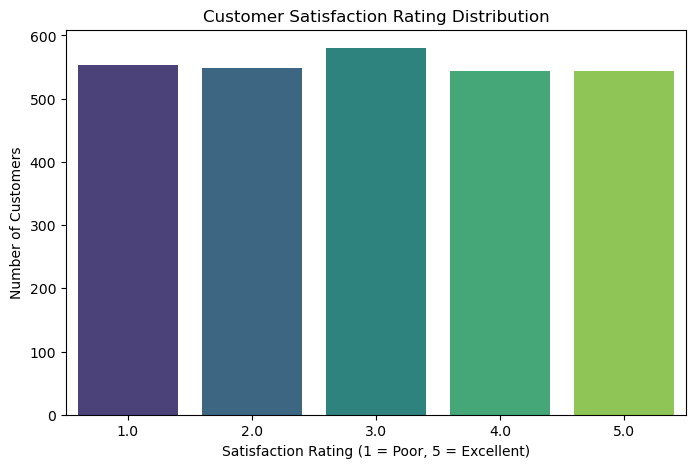

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='viridis')
plt.title("Customer Satisfaction Rating Distribution")
plt.xlabel("Satisfaction Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\sreea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


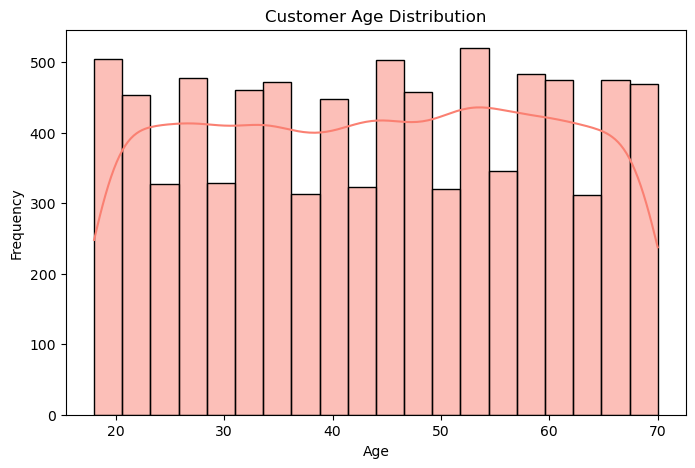

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='salmon')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


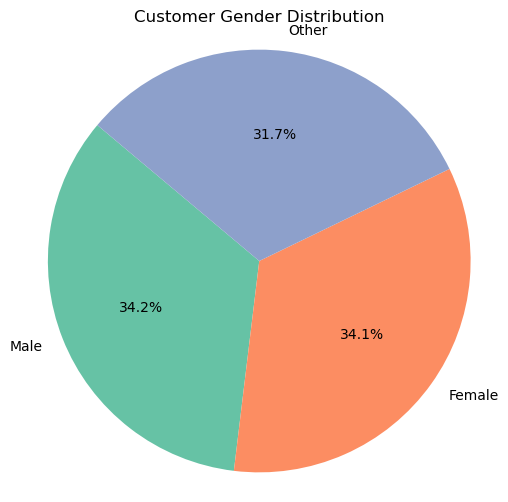

In [8]:
gender_dist = df['Customer Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Customer Gender Distribution")
plt.axis('equal')
plt.show()


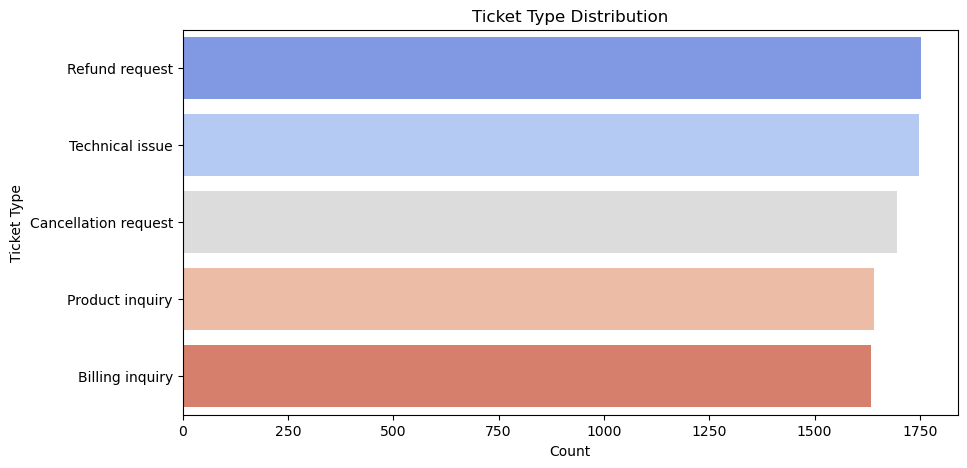

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index, palette='coolwarm')
plt.title("Ticket Type Distribution")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.show()


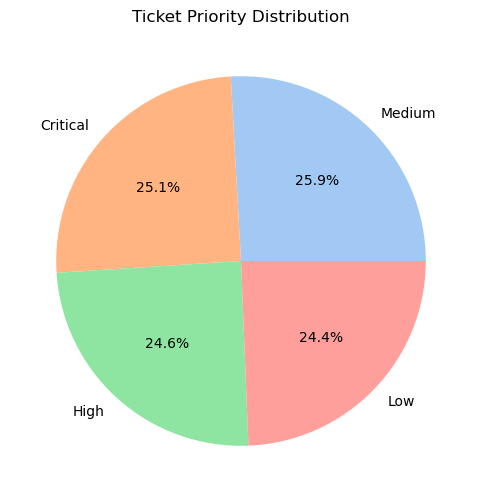

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\sreea\Downloads\customer_support_tickets.csv")
plt.figure(figsize=(6,6))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Ticket Priority Distribution")
plt.ylabel("")
plt.show()


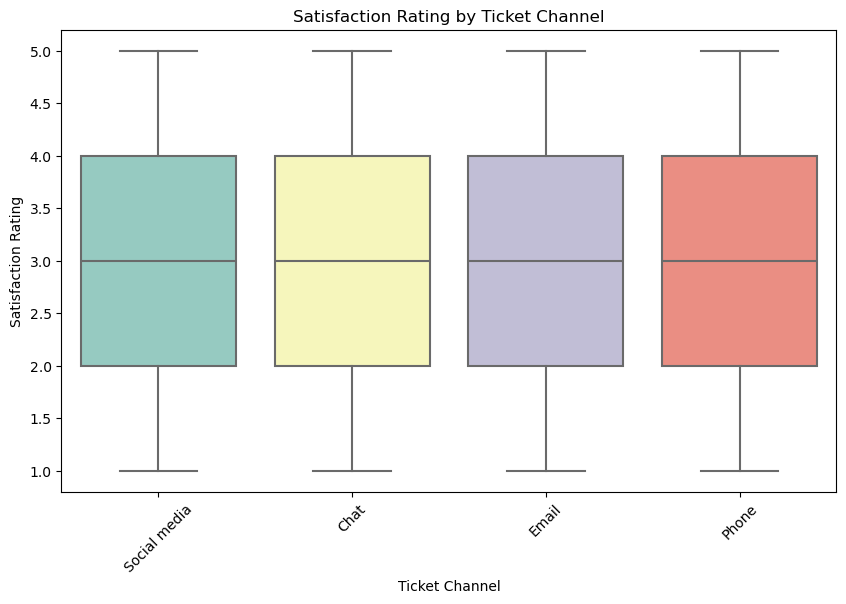

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Ticket Channel', y='Customer Satisfaction Rating', data=df, palette='Set3')
plt.title("Satisfaction Rating by Ticket Channel")
plt.xlabel("Ticket Channel")
plt.ylabel("Satisfaction Rating")
plt.xticks(rotation=45)
plt.show()


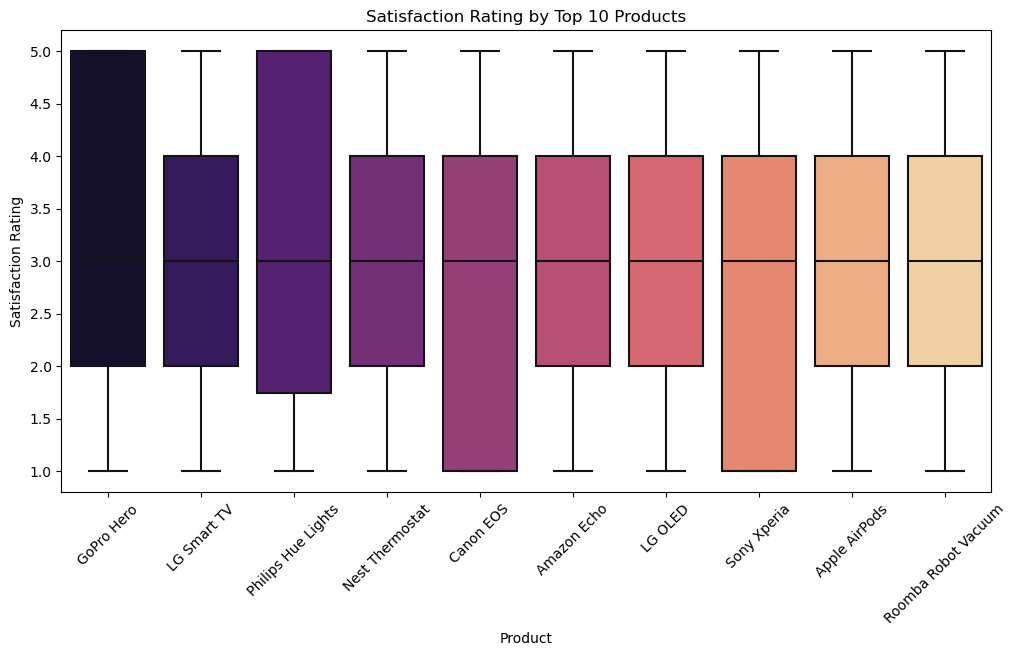

In [4]:
top_products = df['Product Purchased'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Product Purchased'].isin(top_products)],
            x='Product Purchased',
            y='Customer Satisfaction Rating',
            palette='magma')
plt.title("Satisfaction Rating by Top 10 Products")
plt.xlabel("Product")
plt.ylabel("Satisfaction Rating")
plt.xticks(rotation=45)
plt.show()


In [5]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

df['Purchase Year'] = df['Date of Purchase'].dt.year
df['Purchase Month'] = df['Date of Purchase'].dt.month
df['Purchase Day'] = df['Date of Purchase'].dt.dayofweek


In [6]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

df['Response Time (hrs)'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600
df['Resolution Time (hrs)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600


In [7]:
df.drop(['Date of Purchase', 'First Response Time', 'Time to Resolution'], axis=1, inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type',
              'Ticket Status', 'Ticket Priority', 'Ticket Channel']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

print(df.isnull().sum())


Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
Customer Satisfaction Rating    0
Purchase Year                   0
Purchase Month                  0
Purchase Day                    0
Response Time (hrs)             0
Resolution Time (hrs)           0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
X.dtypes
X = df.drop(['Customer Satisfaction Rating'], axis=1)

columns_to_drop = ['Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description', 'Resolution']
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns], errors='ignore')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test_scaled)


Accuracy: 0.19855595667870035

Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.18      0.19       168
         2.0       0.22      0.21      0.21       174
         3.0       0.18      0.20      0.19       175
         4.0       0.20      0.20      0.20       162
         5.0       0.19      0.20      0.20       152

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



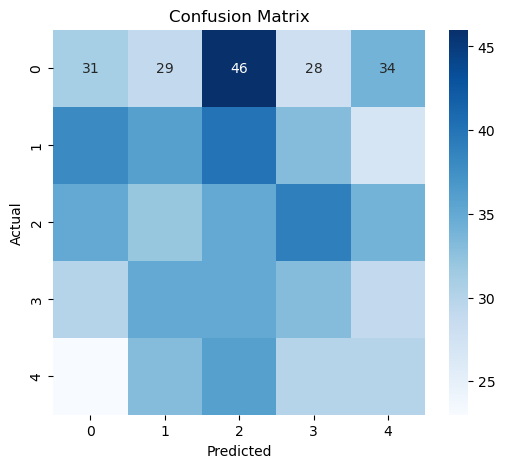

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.20


In [18]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.18      0.19       168
         2.0       0.22      0.21      0.21       174
         3.0       0.18      0.20      0.19       175
         4.0       0.20      0.20      0.20       162
         5.0       0.19      0.20      0.20       152

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



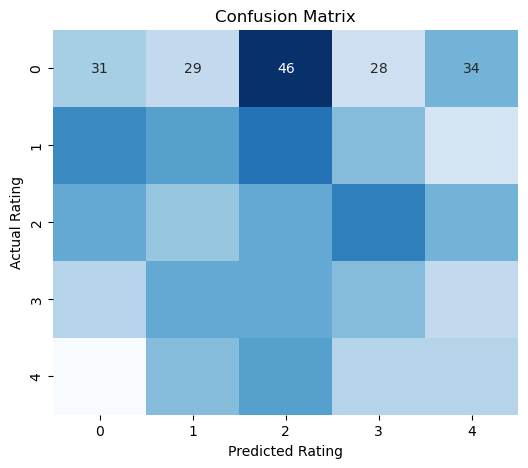

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()


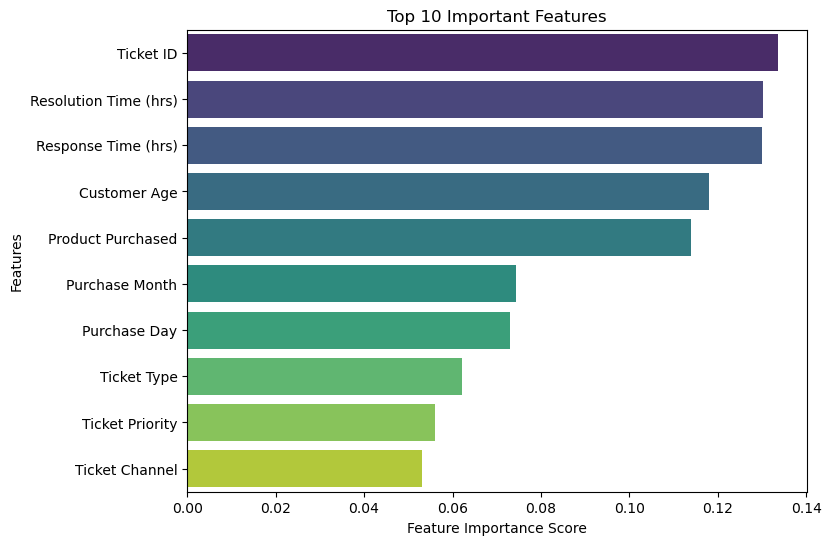

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()



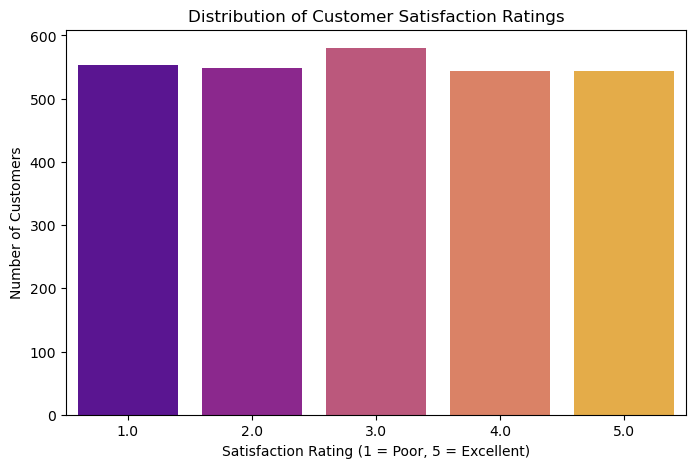

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='plasma')
plt.title("Distribution of Customer Satisfaction Ratings")
plt.xlabel("Satisfaction Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\sreea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


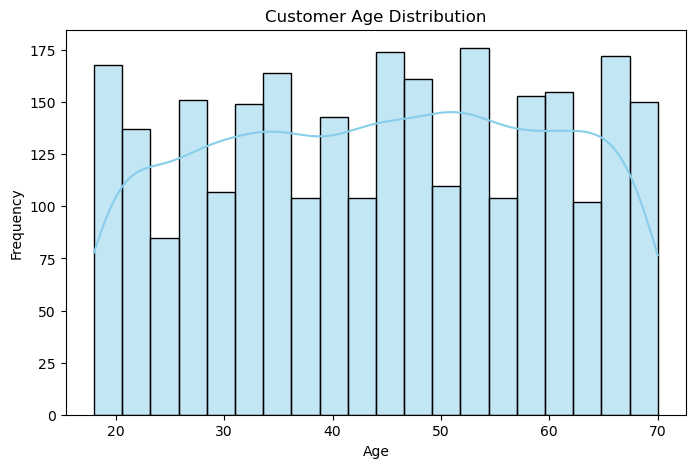

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


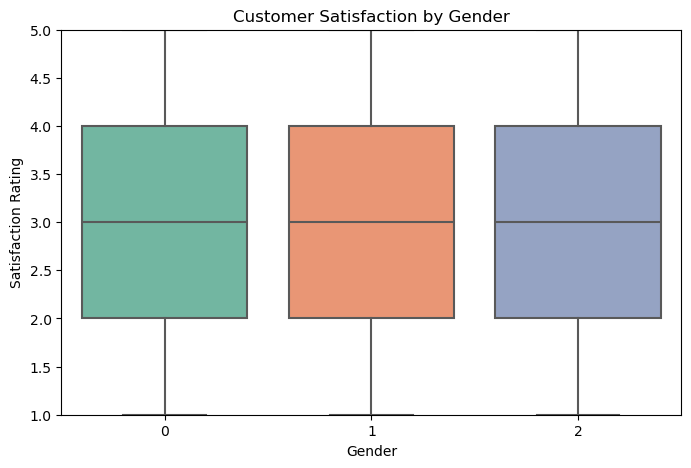

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, palette='Set2')
plt.title("Customer Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Satisfaction Rating")
plt.ylim(1, 5)
plt.show()


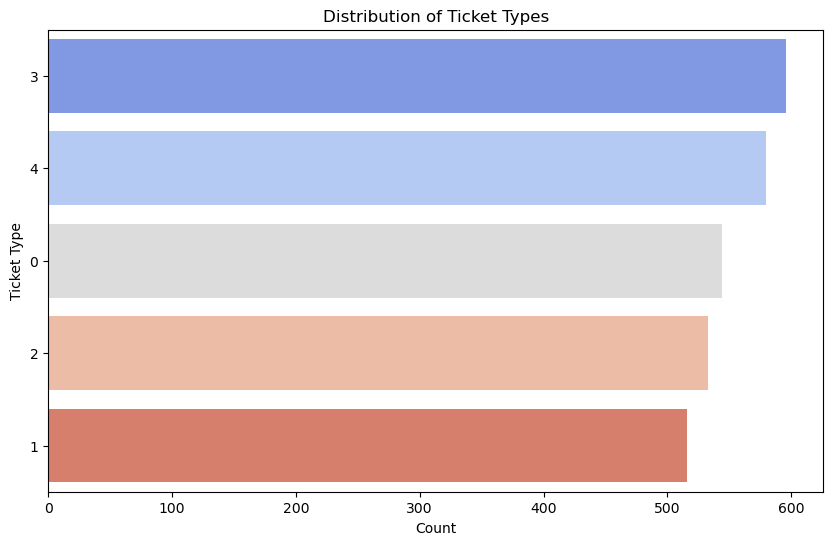

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ticket Types")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.show()


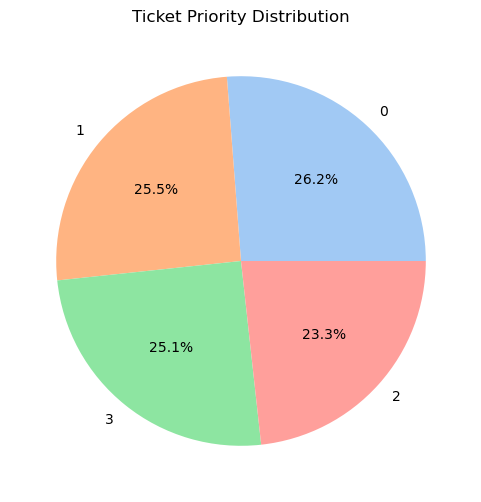

In [27]:
plt.figure(figsize=(6,6))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Ticket Priority Distribution")
plt.ylabel("")
plt.show()


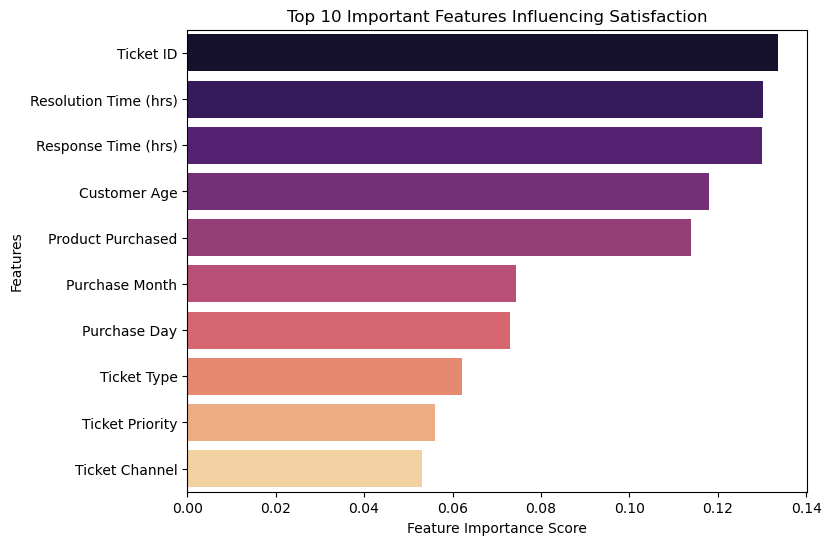

In [28]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title("Top 10 Important Features Influencing Satisfaction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


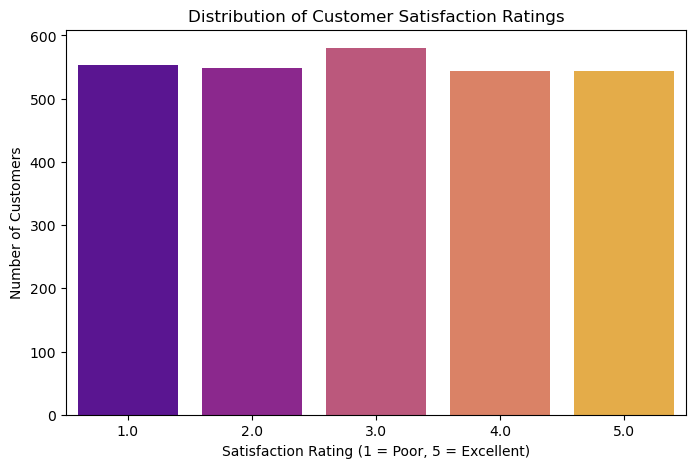

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='plasma')
plt.title("Distribution of Customer Satisfaction Ratings")
plt.xlabel("Satisfaction Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\sreea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


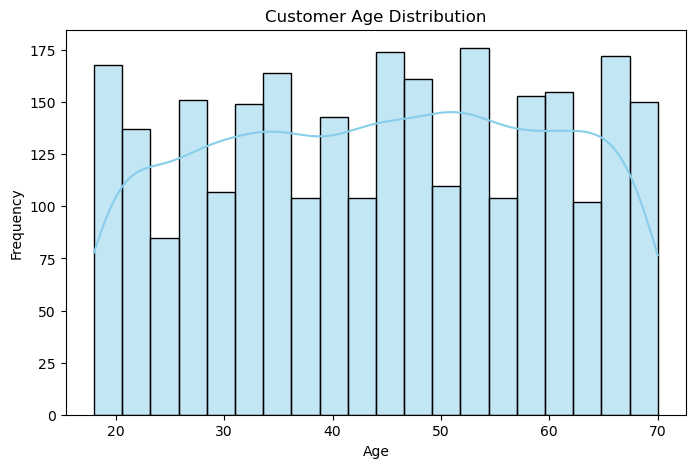

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


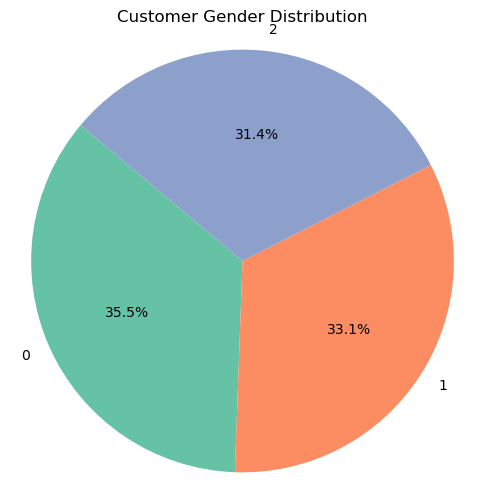

In [31]:
gender_dist = df['Customer Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Customer Gender Distribution")
plt.axis('equal')
plt.show()


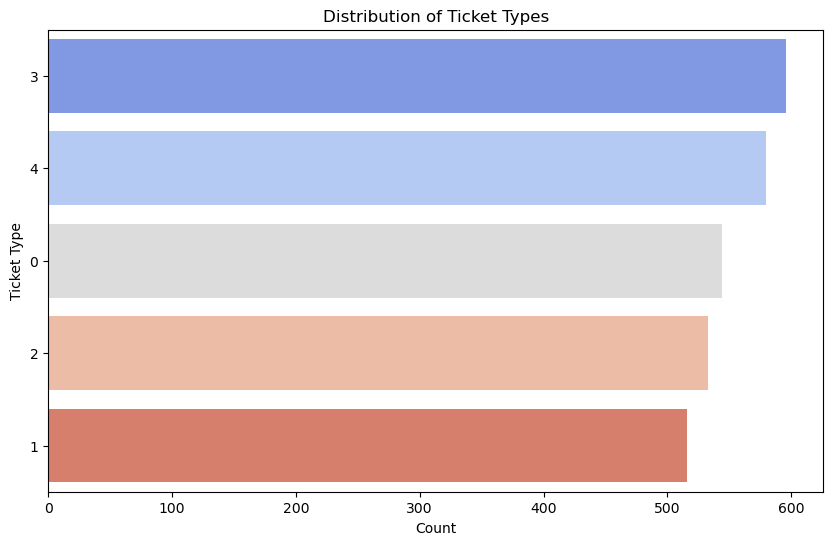

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ticket Types")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.show()


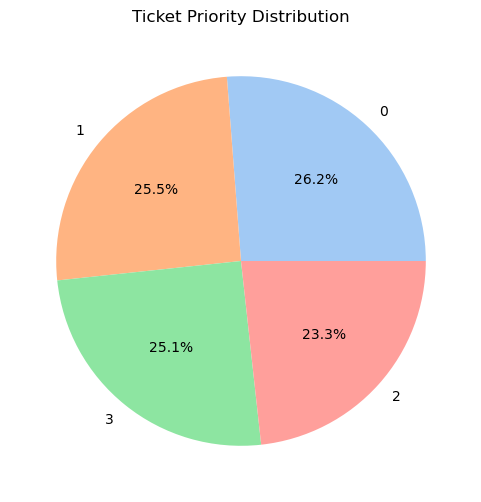

In [33]:
plt.figure(figsize=(6,6))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Ticket Priority Distribution")
plt.ylabel("")
plt.show()


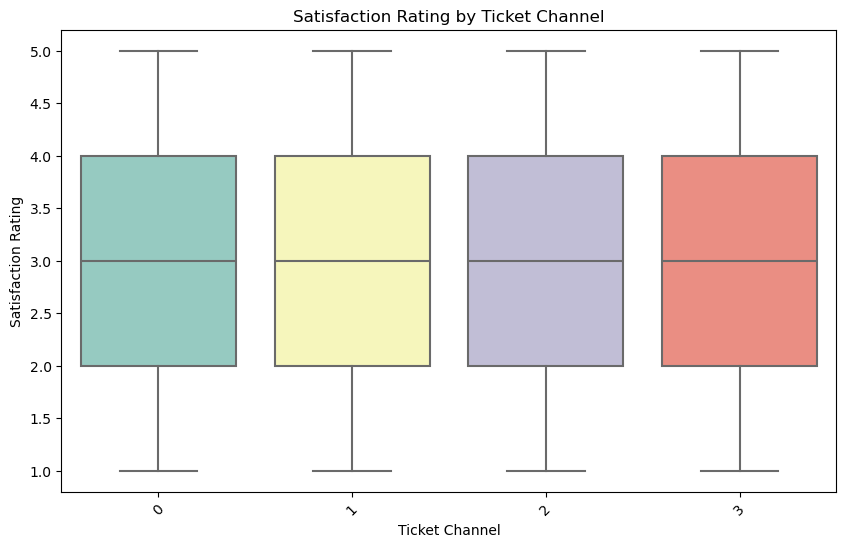

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Ticket Channel', y='Customer Satisfaction Rating', data=df, palette='Set3')
plt.title("Satisfaction Rating by Ticket Channel")
plt.xlabel("Ticket Channel")
plt.ylabel("Satisfaction Rating")
plt.xticks(rotation=45)
plt.show()


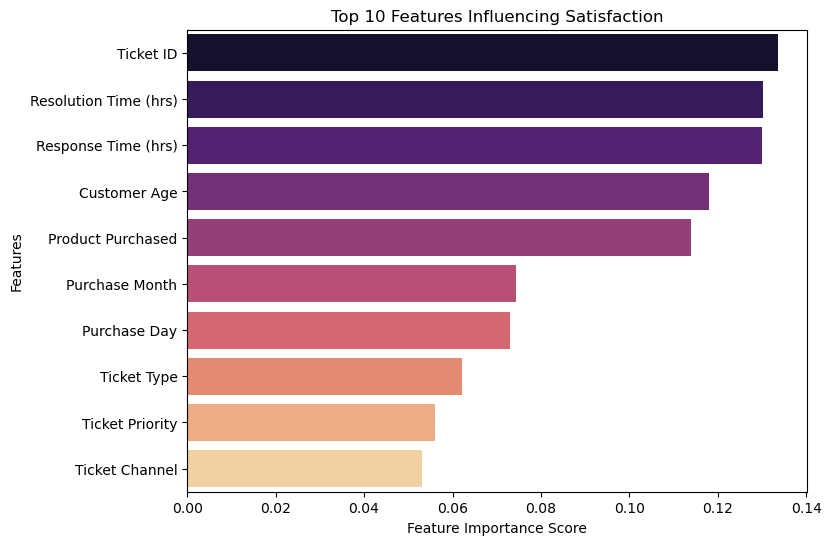

In [35]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title("Top 10 Features Influencing Satisfaction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()
